In [1]:
import os
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

import os
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import numpy as np
import seaborn as sns
sns.set(
    style='whitegrid',
    font='monospace',
    context='paper',
    # font_scale=1.7,
)
# sns.set_style({'legend.frameon':False})

major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."

In [2]:
def plot(
    path: str, 
    algos: list, 
    env: str, 
    title: str, 
    final_version: bool,
    hue_order: list = ['PG', 'HBPG', 'APG (Ours)'],
    img_name: str = None,
):

    if title is None:
        title = env.split('NoFrameskip')[0]
    
    path_list = list()
    name_list = list()
    for algo in algos:
        for dirPath, _, fileNames in os.walk(os.path.join(path, algo, env)):
            for f in fileNames:
                fpath = os.path.join(dirPath, f)
                if 'tfevents' in fpath:
                    # print(algo, fpath)
                    path_list.append(fpath)
                    name_list.append(algo)


    df_all = pd.DataFrame()
    for name, path in zip(name_list, path_list):
        # print(name, path)
        event_base = EventAccumulator(path)
        event_base.Reload()
        event_base.Tags()
        df = pd.DataFrame(event_base.Scalars("eval/mean_reward")).drop(columns=['wall_time'])
        df['category'] = [name]*df.shape[0]
        df_all = pd.concat([df_all, df])
    # print(df_all)

    # change name
    if final_version:
        tmp = df_all.category.tolist()
        tmpp = list()
        for t in tmp:
            if 'apg' in t:
                tmpp.append('APG (Ours)')
            elif 'hb' in t:
                tmpp.append('HBPG')
            elif 'trpo' in t:
                tmpp.append('NPG')
            else:
                tmpp.append('PG')
        df_all.category = tmpp

    # set plot
    scalar = 1.0 if final_version else 2.0
    plt.figure(figsize=(5*scalar, 4*scalar))

    # plot
    graph = sns.lineplot(
        data=df_all,
        x='step',
        y='value',
        hue='category',
        linewidth=3.0,
        markers=False,
        dashes=False,
        markersize=12.0,
        hue_order = hue_order if final_version else None,
        palette={
            'HBPG': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), 
            'PG': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
            'APG (Ours)': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725), 
            'NPG': (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
        } if final_version else None,
        errorbar=("sd", 1),
    )
    plt.legend(loc='best').set_draggable(True)
    graph.set_xlabel(xlabel='Time Steps', fontsize=18, labelpad=7)
    # graph.set_xlabel(xlabel='Total Environment Interactions', fontsize=18, labelpad=7)
    graph.set_ylabel(ylabel='Average Return', fontsize=18, labelpad=7)
    graph.set_xticks(np.linspace(0, int(1e7), 5))
    graph.tick_params(axis='both', labelsize=16)
    # graph.set_yticks(np.linspace(0, 1, 5))
    graph.set_title(
        label=f'{title}', 
        fontdict=dict(weight='bold'), 
        pad=12,
        fontsize=18,
    )

    # change all spines
    for ax in ['top','bottom','left','right']:
        graph.spines[ax].set_linewidth(2)
        graph.spines[ax].set_color('black')
    
    graph.legend().get_frame().set_linewidth(3.0)
    graph.legend().get_frame().set_edgecolor('black')

    # get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # specify order of items in legend
    order = list(range(len(algos)))
    
    # add legend to plot
    leg = plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], frameon=True, edgecolor='black', prop={"size":14}) 

    leg.get_frame().set_linewidth(3.0)

    offset_text = graph.xaxis.get_offset_text()
    offset_text.set_size(14)

    plt.tight_layout() 
    if final_version:
        img = f'{env}-{img_name}' if img_name else env
        print(f'saving fig at ./images/{img}.png')
        plt.savefig(f'./images/{img}.png')
    else:
        plt.show()

### Fig 3(a)-(d). Atari 2600

saving fig at ./images/PongNoFrameskip-v4.png
saving fig at ./images/CarnivalNoFrameskip-v4.png
saving fig at ./images/RiverraidNoFrameskip-v4.png
saving fig at ./images/SeaquestNoFrameskip-v4.png


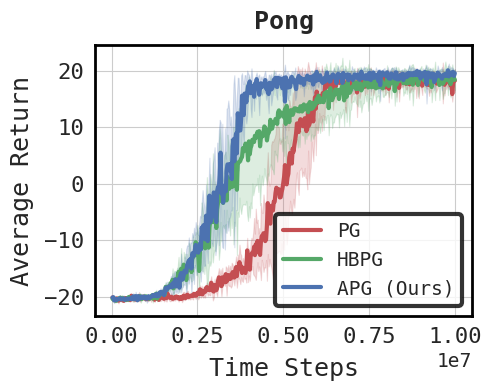

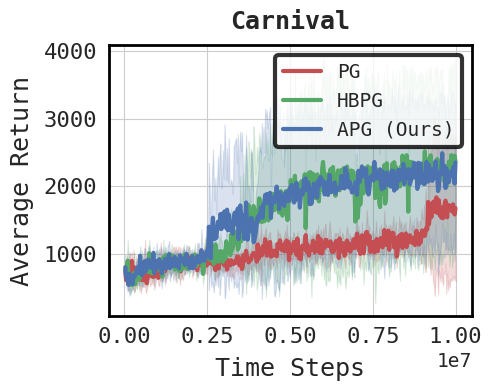

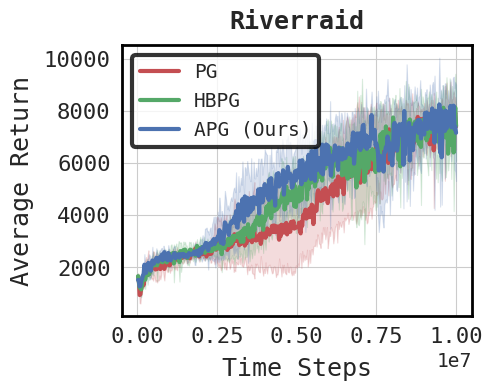

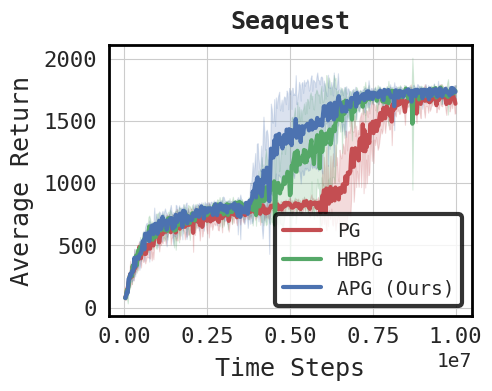

In [18]:
plot(
    path='logs-atari',
    algos=['apg-mom=0.5', 'hb-mom=0.5', 'pg'],
    env='PongNoFrameskip-v4',
    title=None,
    final_version=True,
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.7', 'hb-mom=0.7', 'pg'],
    env='CarnivalNoFrameskip-v4',
    title=None,
    final_version=True,
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.5', 'hb-mom=0.5', 'pg'],
    env='RiverraidNoFrameskip-v4',
    title=None,
    final_version=True,
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.4', 'hb-mom=0.4', 'pg'],
    env='SeaquestNoFrameskip-v4',
    title=None,
    final_version=True,
)

saving fig at ./images/PongNoFrameskip-v4-npg.png
saving fig at ./images/CarnivalNoFrameskip-v4-npg.png
saving fig at ./images/RiverraidNoFrameskip-v4-npg.png
saving fig at ./images/SeaquestNoFrameskip-v4-npg.png


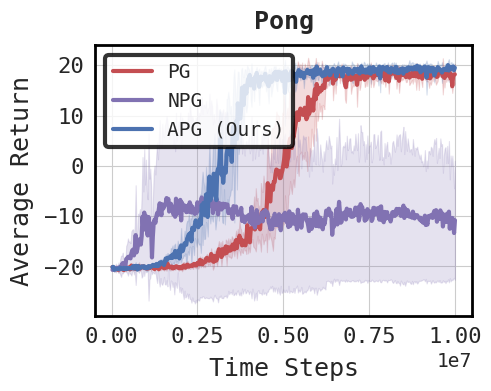

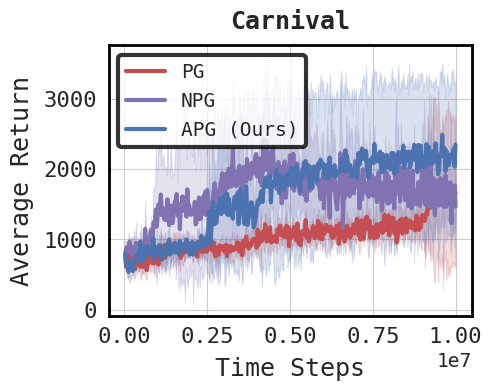

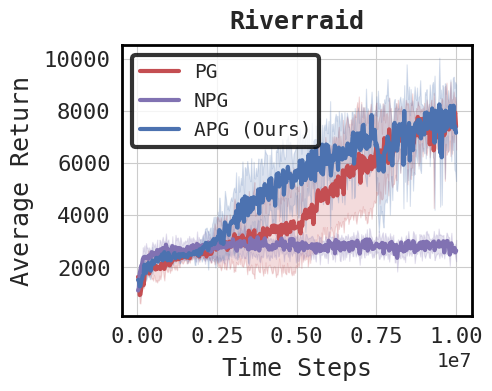

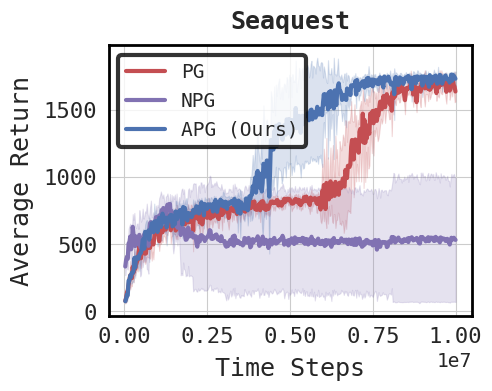

In [3]:

plot(
    path='logs-atari',
    algos=['apg-mom=0.5', 'trpo', 'pg'],
    env='PongNoFrameskip-v4',
    title=None,
    final_version=True,
    hue_order=['PG', 'NPG', 'APG (Ours)'],
    img_name='npg',
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.7', 'trpo', 'pg'],
    env='CarnivalNoFrameskip-v4',
    title=None,
    final_version=True,
    hue_order=['PG', 'NPG', 'APG (Ours)'],
    img_name='npg',
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.5', 'trpo', 'pg'],
    env='RiverraidNoFrameskip-v4',
    title=None,
    final_version=True,
    hue_order=['PG', 'NPG', 'APG (Ours)'],
    img_name='npg',
)
plot(
    path='logs-atari',
    algos=['apg-mom=0.4', 'trpo', 'pg'],
    env='SeaquestNoFrameskip-v4',
    title=None,
    final_version=True,
    hue_order=['PG', 'NPG', 'APG (Ours)'],
    img_name='npg',
)